In [75]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [62]:
from torchvision.io import read_image
img = read_image("data/12.jpg")

In [63]:
from torchvision.models import resnet50, ResNet50_Weights
# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction_res_net_50 = model(batch).squeeze(0).softmax(0)

In [65]:
from torchvision.models import alexnet, ResNet50_Weights, AlexNet_Weights

# Step 1: Initialize model with the best available weights
weights = AlexNet_Weights.IMAGENET1K_V1
model = alexnet(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction_alex_net = model(batch).squeeze(0).softmax(0)

In [66]:
from torchvision.models import vgg16, ResNet50_Weights, VGG16_Weights

# Step 1: Initialize model with the best available weights
weights = VGG16_Weights.IMAGENET1K_V1
model = vgg16(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction_vgg_16 = model(batch).squeeze(0).softmax(0)

In [73]:
def show_pred(prediction, name):
    val, index = torch.topk(prediction, 5)
    print(name)
    for i in range(5):
        category_name = weights.meta["categories"][index[i]]
        print(f"{category_name}: {100 * val[i]:.1f}%")

1
vgg_16
coffee mug: 42.9%
beer glass: 28.1%
cup: 8.4%
candle: 7.1%
saltshaker: 6.1%
res_net_50
beer glass: 17.1%
cup: 10.9%
coffee mug: 4.1%
pitcher: 1.3%
beer bottle: 1.2%
alex_net
beer glass: 31.8%
cup: 29.5%
coffee mug: 10.5%
eggnog: 10.3%
candle: 3.4%


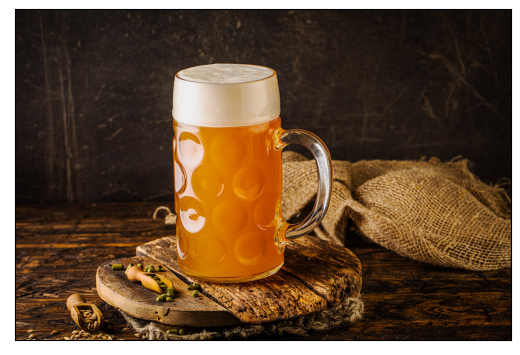

In [76]:
print('1')
show_pred(prediction_vgg_16, "vgg_16")
show_pred(prediction_res_net_50, "res_net_50")
show_pred(prediction_alex_net, "alex_net")
show(img)